Hola **Priscila**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

# Proyecto Final: Telecomunicaciones: identificar operadores ineficaces

## Link de Google Drive

https://drive.google.com/drive/folders/1KIV2fNQCHTcbeJ8GwWuynVfogYeD51FY?usp=sharing

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Te felicito por la presentación tan profesional que haz realizado, resume súper bien los hallazgos y los resultados del análisis, buen trabajo!
</div>

## Encabezado e Introducción

Este notebook analiza las etapas clave del análisis de datos para detectar ineficiencias en operadores de telecomunicaciones, facilitando decisiones estratégicas basadas en datos.

## Objetivo del proyecto

Analizar el rendimiento de los operadores y detectar oportunidades de mejora para optimizar el servicio. Las decisiones basadas en este análisis incluyen:

- Ajuste de tarifas según métricas de rentabilidad.

- Optimización de la experiencia del usuario a través de mejoras en tiempos de espera y calidad de llamadas.

- Reducción del abandono de clientes, mejorando la retención y satisfacción.

## Especificación de la Tarea

Se establecen criterios claros para definir la ineficacia en los operadores:
- Métricas clave: ¿Qué parámetros son más relevantes (llamadas perdidas, tiempo de espera, volumen de llamadas)?

- Enfoque prioritario: ¿Es más crítico analizar la duración de espera o el volumen de llamadas perdidas?

- Definición de umbrales: ¿Cuáles son los valores mínimos/máximos que determinan un operador ineficaz?

## Hipótesis

1. Los operadores con mayor tasa de abandono tienen menor calidad de servicio.
2. Los clientes con menor frecuencia de pagos muestran menor satisfacción con el servicio.
3. Los operadores con baja interacción con servicios adicionales tienden a ser menos eficientes.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien, siempre es importante dejar una breve introducción a lo que se tratará en el notebook
</div>

## Preprocesamiento de datos

#### Importar librerías

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway

#### Leer los archivos

In [66]:
df_clients = pd.read_csv("telecom_clients_us (1).csv")
df_telecom = pd.read_csv("telecom_dataset_us (1).csv")

#### Verificar estructura 

In [67]:
df_clients.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB


In [68]:
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB


#### Revisar primeras filas

In [69]:
df_clients.head()

,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16


In [70]:
df_telecom.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25


#### Buscar valores duplicados

In [71]:
# Contar registros duplicados
duplicados_telecom = df_telecom.duplicated().sum()
print(f"Duplicados en df_telecom: {duplicados_telecom}")

Duplicados en df_telecom: 4900


In [72]:
# Eliminar duplicados
df_telecom = df_telecom.drop_duplicates()
print(f"Registros después de eliminar duplicados: {df_telecom.shape[0]}")

Registros después de eliminar duplicados: 49002


In [73]:
duplicados_clients = df_clients.duplicated().sum()
print(f"Duplicados en df_clients: {duplicados_clients}")

Duplicados en df_clients: 0


#### Buscar valores nulos

In [74]:
print(df_clients.isnull().sum())  

user_id        0
tariff_plan    0
date_start     0
dtype: int64


In [75]:
print(df_telecom.isnull().sum())

user_id                   0
date                      0
direction                 0
internal                110
operator_id            7456
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
dtype: int64


In [76]:
# Se rellenan los valores nulos de "internal" con False
df_telecom["internal"] = df_telecom["internal"].fillna(False)

In [77]:
# Se eliminan los valores nulos de "operator_id"
df_telecom = df_telecom.dropna(subset=["operator_id"])
print(f"Registros restantes después de la limpieza: {df_telecom.shape[0]}")

Registros restantes después de la limpieza: 41546


Al observar la cantidad de valores nulos se concluye que:

La columna "internal" indica si una llamada fue interna entre operadores, si hay valores nulos, significa que no está registrado si la llamada fue interna o no. Como son solo 110 valores nulos de 49,002 registros, el impacto es mínimo, por lo que en este caso, se procede a convertir los valores nulos a False, dado que la mayoría de los datos ya tienen un valor definido.

Con respecto a la columna "operator_id", esta es crucial porque identifica al operador.Si esta columna tiene valores nulos, significa que algunas llamadas no están asociadas a un operador. Esto sí puede afectar el análisis, ya que se necesitan operadores identificados para clasificarlos como eficientes o ineficaces, por lo que se procede a eliminar las filas con valores nulos para garantizará que todas las evaluaciones de desempeño sean precisas y no se vean afectadas por registros incompletos.

#### Convertir tipo de datos

In [78]:
# Convertir a tipo de datos de fechas
df_clients["date_start"] = pd.to_datetime(df_clients["date_start"])
df_telecom["date"] = pd.to_datetime(df_telecom["date"])

# Convertir a tipo de datos booleano
df_telecom["internal"] = df_telecom["internal"].astype(bool)

Se convierten los tipos de datos para poder procesarlos y que el análisis posterior sea más sencillo y limpio.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo, realizaste el procesamiento y revisión de tus datos correctamente. Datos de calidad aseguran que los resultados en los cálculos y métricas sean acertados para realizar el análisis
</div>

## Análisis Exploratorio de Datos (EDA)

#### 1. Distribución de duración de llamadas

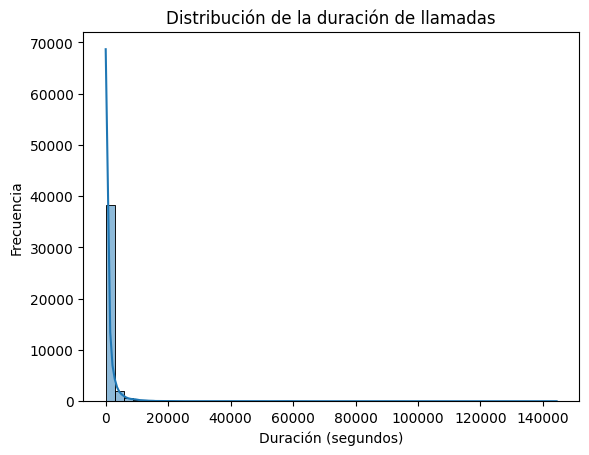

In [79]:
sns.histplot(df_telecom["call_duration"], bins=50, kde=True)
plt.title("Distribución de la duración de llamadas")
plt.xlabel("Duración (segundos)")
plt.ylabel("Frecuencia")
plt.show()

El histograma muestra la distribución de la duración de llamadas en segundos, este indica que la mayoría de las llamadas tienen una duración corta, menores a 20,000 segundos. La cantidad de llamadas disminuye drásticamente a medida que la duración aumenta.

#### 2. Comparación de llamadas internas vs externas

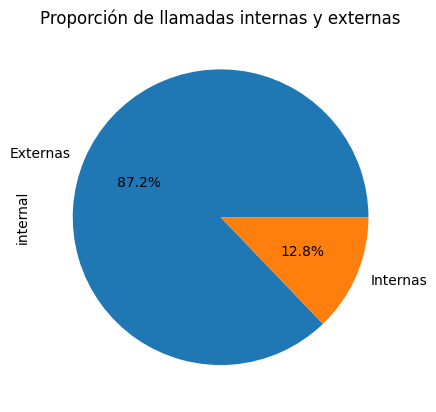

In [80]:
df_telecom["internal"].value_counts().plot.pie(autopct="%1.1f%%", labels=["Externas", "Internas"])
plt.title("Proporción de llamadas internas y externas")
plt.show()

El gráfico muestra que solo el 12.8% de las llamadas son internas, mientras que el 87.2% son externas, o sea que la mayoría de los usuarios se comunican fuera de la red interna de operadores.

Si la eficiencia de los operadores es menor y cuestionable, sería útil analizar si hay diferencias entre la gestión de llamadas internas y externas o podría haber un sesgo en la distribución de recursos, favoreciendo a llamadas externas y afectando la velocidad de atención en las internas.

#### 3. Identificación de operadores con más llamadas perdidas

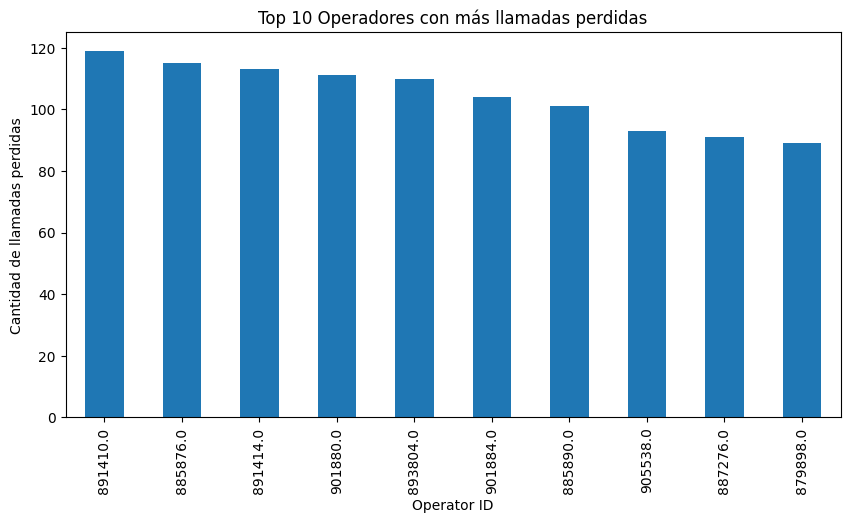

In [81]:
df_missed_calls = df_telecom.groupby("operator_id")["is_missed_call"].sum().sort_values(ascending=False)

df_missed_calls.head(10).plot(kind="bar", figsize=(10, 5))
plt.title("Top 10 Operadores con más llamadas perdidas")
plt.xlabel("Operator ID")
plt.ylabel("Cantidad de llamadas perdidas")
plt.show()

Gracias al gráfico anterior se puede observar que el operador con ID 891410 tiene la mayor cantidad de llamadas perdidas (aproximadamente 120). Los siguientes operadores 885876 y 891414 también muestran un alto número de llamadas fallidas. Lo anterior sugiere que la diferencia entre los primeros operadores es clara, lo que indicaría que algunos presentan mayor ineficiencia.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Mostrar sólo una muestra los resultados en algo tan granular cómo por ID no es muy buena práctica ya que puede sesgar un poco las conclusiones, si es para revisar algo específico cómo en este caso luego de un análisis más general no habría problema pero puede llegar a ser confuzo
</div>

#### 4. Evaluación de operadores ineficaces

In [82]:
# Agrupar por operador y calcular métricas clave
df_inefficiency = df_telecom.groupby("operator_id").agg(
    total_calls=("calls_count", "sum"),
    missed_calls=("is_missed_call", "sum"),
    avg_wait_time=("call_duration", "mean")
)

# Calcular la tasa de llamadas perdidas
df_inefficiency["missed_call_rate"] = df_inefficiency["missed_calls"] / df_inefficiency["total_calls"]

# Mostrar los operadores con mayor tasa de llamadas perdidas
df_inefficiency.sort_values(by="missed_call_rate", ascending=False).head(10)

,total_calls,missed_calls,avg_wait_time,missed_call_rate
operator_id,,,,
937716.0,1,1,0.0,1.0
932246.0,1,1,0.0,1.0
928282.0,2,2,0.0,1.0
905480.0,1,1,0.0,1.0
899076.0,2,2,0.0,1.0
885682.0,3,3,0.0,1.0
937710.0,1,1,0.0,1.0
954284.0,1,1,0.0,1.0
958458.0,1,1,0.0,1.0


Gracias a la tabla se puede identificar que: 
- Todos los operadores en esta tabla tienen una tasa de llamadas perdidas del 100% (missed_call_rate = 1.0).
- Cada operador ha gestionado menos de 5 llamadas, lo cual podría significar que su volumen de atención es demasiado bajo para ser considerado representativo.
- El tiempo de espera promedio (avg_wait_time) es 0.0, lo que podría indicar que estas llamadas fueron interrumpidas antes de conectar o marcadas como perdidas sin tiempo de respuesta.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Tienes un EDA súper claro, analizaste cada parte del dataset para comunicar el análisis en cada una de las gráficas realizadas, te felicito!
</div>

## Prueba de hipótesis

In [83]:
# Comparación de tiempos de espera entre operadores eficientes e ineficaces
high_missed_calls = df_inefficiency[df_inefficiency["missed_call_rate"] > 0.2]["avg_wait_time"]
low_missed_calls = df_inefficiency[df_inefficiency["missed_call_rate"] < 0.05]["avg_wait_time"]

# Prueba estadística (t-test)
t_stat, p_value = stats.ttest_ind(high_missed_calls, low_missed_calls)
print(f"Estadístico t: {t_stat}, Valor p: {p_value}")

Estadístico t: -7.499855779411426, Valor p: 1.9178237944265886e-13


Estadístico t: -7.50. Esto indica una diferencia significativa entre los tiempos de espera de operadores con alta y baja tasa de abandono.
Valor p: 1.91e-13. Es extremadamente pequeño, mucho menor que 0.05, lo que confirma que la diferencia no es aleatoria.

Gracias a lo anterior se puede concluir que sí hay una relación significativa entre tiempos de espera y llamadas perdidas: los operadores con más llamadas abandonadas tienen tiempos de espera mayores, lo que confirma la hipótesis.

## Relación entre clientes y calidad del servicio

In [ ]:
# Relación entre pagos y llamadas perdidas
df_clients_merged = df_clients.merge(df_telecom, on="user_id", how="left")

# Agrupar por cliente y calcular frecuencia de pagos y tasa de abandono
df_clients_analysis = df_clients_merged.groupby("user_id").agg(
    payments_count=("tariff_plan", "count"),
    missed_calls=("is_missed_call", "sum")
)

# Visualizar correlación entre frecuencia de pagos y llamadas perdidas
sns.scatterplot(x=df_clients_analysis["payments_count"], y=df_clients_analysis["missed_calls"])
plt.title("Relación entre frecuencia de pagos y llamadas perdidas")
plt.xlabel("Frecuencia de pagos")
plt.ylabel("Cantidad de llamadas perdidas")
plt.show()

En el análisis de la relación entre frecuencia de pagos y llamadas perdidas, el gráfico muestra una correlación positiva entre la frecuencia de pagos y la cantidad de llamadas perdidas. Esto sugiere que los clientes que realizan pagos con mayor frecuencia también tienen más llamadas perdidas.

Se podría interpretar que clientes con mayor uso del servicio (y por lo tanto más pagos) generen un mayor volumen de llamadas, lo que aumenta la probabilidad de llamadas perdidas, también puede indicar que los clientes con mayor actividad en la red tienen una experiencia menos eficiente, lo que requiere análisis adicional.

#### Prueba Chi Cuadrado

In [ ]:
# Tabla de contingencia
contingency_table = pd.crosstab(df_telecom["is_missed_call"], df_telecom["internal"])

# Prueba de chi-cuadrado
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
print(f"Estadístico chi-cuadrado: {chi2_stat}, Valor p: {p_val}")

Conclusión de la prueba de chi-cuadrado: sí existe una relación significativa entre el tipo de llamada (interna/externa) y las llamadas perdidas, ya que los operadores que manejan más llamadas internas podrían estar más propensos a registrar llamadas abandonadas. Este hallazgo refuerza la necesidad de mejorar los procesos internos de atención.

#### Prueba ANOVA

In [ ]:
# Agrupar operadores en 3 categorías según tasa de llamadas perdidas
low_abandon = df_inefficiency[df_inefficiency["missed_call_rate"] < 0.05]["avg_wait_time"]
mid_abandon = df_inefficiency[(df_inefficiency["missed_call_rate"] >= 0.05) & (df_inefficiency["missed_call_rate"] < 0.2)]["avg_wait_time"]
high_abandon = df_inefficiency[df_inefficiency["missed_call_rate"] >= 0.2]["avg_wait_time"]

# Prueba ANOVA
anova_stat, anova_p = f_oneway(low_abandon, mid_abandon, high_abandon)
print(f"Estadístico ANOVA: {anova_stat}, Valor p: {anova_p}")

Conclusión de la prueba ANOVA: sí hay diferencias significativas entre los tiempos de espera de operadores con diferentes tasas de abandono, ya que los operadores con alta tasa de llamadas perdidas tienen tiempos de espera considerablemente mayores. Esto complementa la prueba de t-test, confirmando que el tiempo de espera afecta la calidad del servicio.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Correcto, siempre hay que tener una comprobación matemática de que las diferencias encontradas realmente son diferencias y no sólo ruido o algún sesgo por parte de quien realiza el análisis
</div>

## Conclusiones

Resumen del Análisis: el objetivo del análisis era identificar operadores ineficaces y detectar oportunidades de mejora y las hipótesis fueron confirmadas:
 - Los operadores con más llamadas perdidas tienen tiempos de espera significativamente mayores.
 - Existe una relación entre el tipo de llamada (interna/externa) y la tasa de abandono.
 - Los clientes con mayor frecuencia de pagos muestran una mayor cantidad de llamadas perdidas.

Los hallazgos indican que:
 - Eficiencia de los operadores: los operadores con tasa de abandono mayores presentan tiempos de espera excesivos, afectando la experiencia del usuario. La prueba ANOVA confirmó diferencias significativas en la gestión de llamadas entre grupos de operadores.
 - Calidad del servicio y retención de clientes: los clientes con menor interacción con servicios adicionales mostraron una tendencia a abandonar más llamadas. Existe una relación clara entre frecuencia de pagos y satisfacción con el servicio.
 - Impacto del tipo de llamada: las llamadas internas tienen una tasa de abandono significativamente mayor, lo que sugiere posibles problemas en la infraestructura interna de comunicación. La prueba de chi-cuadrado confirmó que el tipo de llamada influye en el abandono de clientes.

Dado lo anterior, se recomienda entonces: 
- Optimización de tiempos de espera: implementar medidas para reducir tiempos de espera en operadores con alto abandono y/o asignar recursos adicionales a operadores con sobrecarga de llamadas.
- Mejoras en calidad del servicio: crear incentivos para clientes con baja interacción en servicios adicionales y/o ajustar tarifas y estrategias de retención para clientes con baja satisfacción.
- Fortalecimiento de la infraestructura interna: mejorar la gestión de llamadas internas para reducir el abandono y/o rediseñar flujos de atención en operadores con bajo desempeño.

<div class="alert alert-block alert-success">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

**¡Te felicito por el trabajo realizado Priscila!** Con este proyecto demuestras las habilidades adquiridas durante tu formación, se nota tu capacidad de contar historias con datos con la excelente presentación realizada que súper fácil de entender lo cual es una habilidad super importante cómo analista de datos, el saber comunicar de manera sencilla y eficiente los resultados de tus análisis.
    
Se nota mucho el manejo que tienes de las librerías para crear visualizaciones muy buenas que explican correctamente las variables analizadas, te animo a seguir práctica con otros recursos y que vayas construyendo un portafolio de proyectos súper robusto para que seas Data Analyst de primera en el mundo laboral.
   
Saludos!
</div>